## Credit Card Fraud Detection Both Supervised and Unsupervised Algorithms

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from numpy.random import seed
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
seed(42)
import os
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, silhouette_score

import time
import warnings
warnings.filterwarnings("ignore")


### Importing preprocessed data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_resample= pd.read_csv('/content/drive/MyDrive/X.csv')
y_resample= pd.read_csv('/content/drive/MyDrive/y.csv')
df= X_resample
df['Class']= y_resample

In [5]:
y_resample.rename(columns={'0': 'Class'}, inplace=True)

In [6]:
y_resample

,Class
0,0
1,0
2,0
3,0
4,0
...,...
568625,1
568626,1
568627,1
568628,1


In [7]:
y_resample= y_resample['Class']
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
print("length of X_train:: ",len(X_train))
print("length of y_train:: ",len(y_train))
print("length of X_test:: ",len(X_test))
print("length of y_test:: ",len(y_test))

length of X_train::  398041
length of y_train::  398041
length of X_test::  170589
length of y_test::  170589


In [19]:
def RFC(data):
    classifier = RandomForestClassifier()

    y= data['Class']
    x= data.drop(columns=['Class'],axis=1)
    x_train_RFC,x_test_RFC,y_train_RFC,y_test_RFC = train_test_split(x,y,test_size= 0.3,random_state=0)
    start = time.process_time()

    classifier = RandomForestClassifier(n_estimators=25,criterion='entropy', random_state=42,max_depth=10,class_weight='balanced')
    classifier.fit(x_train_RFC,y_train_RFC)
    print("time taken by RFC is :",time.process_time() - start)
    y_pred_RFC = classifier.predict(x_test_RFC)
    print('Classifcation report:\n', classification_report(y_test_RFC, y_pred_RFC))

    from sklearn.metrics import f1_score, recall_score, precision_score
    matrix = confusion_matrix(y_pred=y_pred_RFC, y_true=y_test_RFC)


    class_names = ['not_fraud', 'fraud']
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
    fig, ax = plt.subplots(1, 2, figsize=(24,5))

    sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Actual")

    precision, recall, _ = precision_recall_curve(y_test_RFC,y_pred_RFC)
    ax[1].plot(recall, precision)
    ax[1].set_title("Precision-recall Curve")
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    plt.show()
    precision_score= round(precision_score(y_test_RFC, y_pred_RFC),2)
    f1_score = round(f1_score(y_test_RFC, y_pred_RFC), 2)
    recall_score = round(recall_score(y_test_RFC, y_pred_RFC),2)
    print("Sensitivity/Recall for RFC Model 1 : {recall_score}".format(recall_score = recall_score))
    print("Precision for RFC Model 1 : {precision_score}".format(precision_score = precision_score))
    print("F1 Score for RFC Model 1 : {f1_score}".format(f1_score = f1_score))
    print("accuracy of the RFC model is: ",accuracy_score(y_pred=y_pred_RFC, y_true=y_test_RFC)*100)



In [21]:
def SVC(data):
    data= data.sample(100000)
    from sklearn import svm

    y= data['Class']
    x= data.drop(columns=['Class'],axis=1)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)
    start = time.process_time()
    class_names = {0: 'Not Fraud', 1: 'Fraud'}

    classifier= svm.SVC(kernel= 'linear')
    classifier.fit(x_train,y_train)
    print("time taken by SVC is :",time.process_time() - start)
    y_pred = classifier.predict(x_test)
    print('Classifcation report:\n', classification_report(y_test, y_pred))

    from sklearn.metrics import f1_score, recall_score, precision_score
    matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


    class_names = ['not_fraud', 'fraud']
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
    fig, ax = plt.subplots(1, 2, figsize=(24,5))

    sns.heatmap(dataframe, ax=ax[0], annot=True, cmap="Blues", fmt = 'g')
    ax[0].set_title("Confusion Matrix")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Actual")

    precision, recall, _ = precision_recall_curve(y_test,y_pred)
    ax[1].plot(recall, precision)
    ax[1].set_title("Precision-recall Curve")
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    plt.show()
    precision_score= round(precision_score(y_test, y_pred),2)
    f1_score = round(f1_score(y_test, y_pred), 2)
    recall_score = round(recall_score(y_test, y_pred),2)
    print("Sensitivity/Recall for SVC Model 1 : {recall_score}".format(recall_score = recall_score))
    print("Precision for SVC Model 1 : {precision_score}".format(precision_score = precision_score))
    print("F1 Score for SVC Model 1 : {f1_score}".format(f1_score = f1_score))
    print("accuracy of the SVC model is: ",accuracy_score(y_pred=y_pred, y_true=y_test)*100)


In [14]:
state = 1
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X_resample),
                                        contamination=0.5,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=0.5)
}

outlier = pd.DataFrame()

### Combining supervised and Unsupervised

In [15]:
!pip install pyod
from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(X_resample)
c = clf.decision_function(X_resample)
print(c)


     |████████████████████████████████| 112kB 8.1MB/s 
  Created wheel for pyod: filename=pyod-0.8.8-cp37-none-any.whl size=116967 sha256=1086eb7345bdd20904c6883a5ac8b4e007638fa019112308a25951ab783e980a
  Stored in directory: /root/.cache/pip/wheels/54/dd/36/a12fa930455b7c38902f2dbf737175421ad30436e47ac5b24d
Successfully built pyod
[34.73022539 33.1415765  45.36832386 ... 32.84251245 53.3792273
 44.28331609]


### COPOD + RFC

time taken by RFC is : 65.78319489999998
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



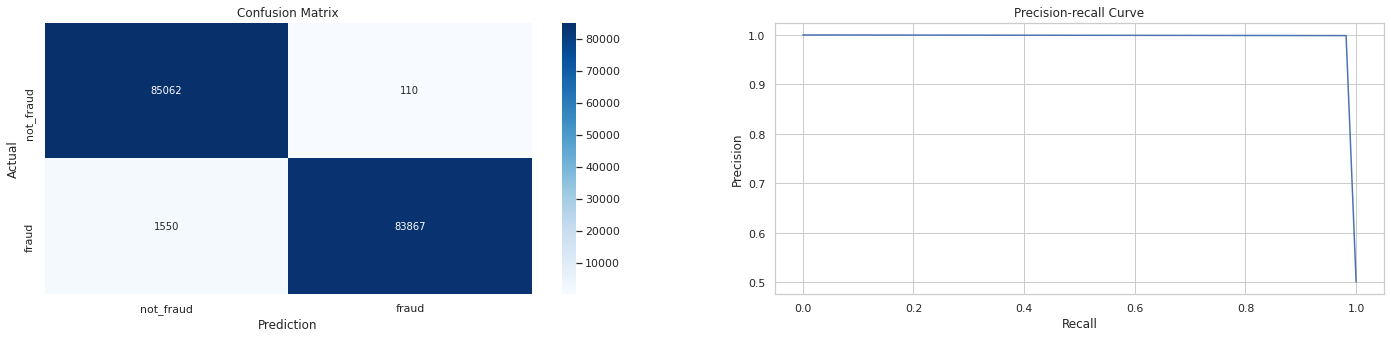

Sensitivity/Recall for RFC Model 1 : 0.98
Precision for RFC Model 1 : 1.0
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  99.02690091389246


In [22]:
df['score']=c
outlier['copod']=c
RFC(df)

### COPOD + SVC

time taken by SVC is : 88.39827549700004
Classifcation report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15104
           1       0.98      0.93      0.95     14896

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



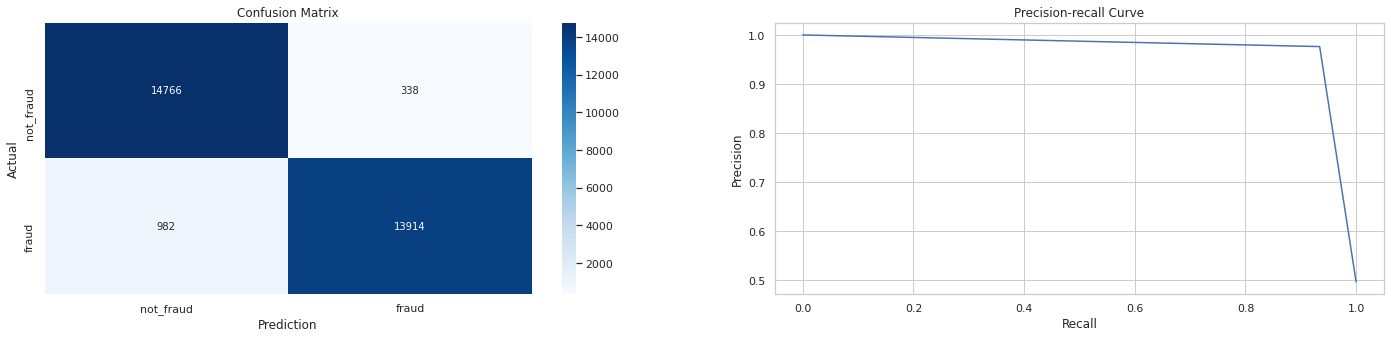

Sensitivity/Recall for SVC Model 1 : 0.93
Precision for SVC Model 1 : 0.98
F1 Score for SVC Model 1 : 0.95
accuracy of the SVC model is:  95.6


In [23]:
SVC(df)
del df['score']

### IForest + RFC

time taken by RFC is : 64.53353207200001
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



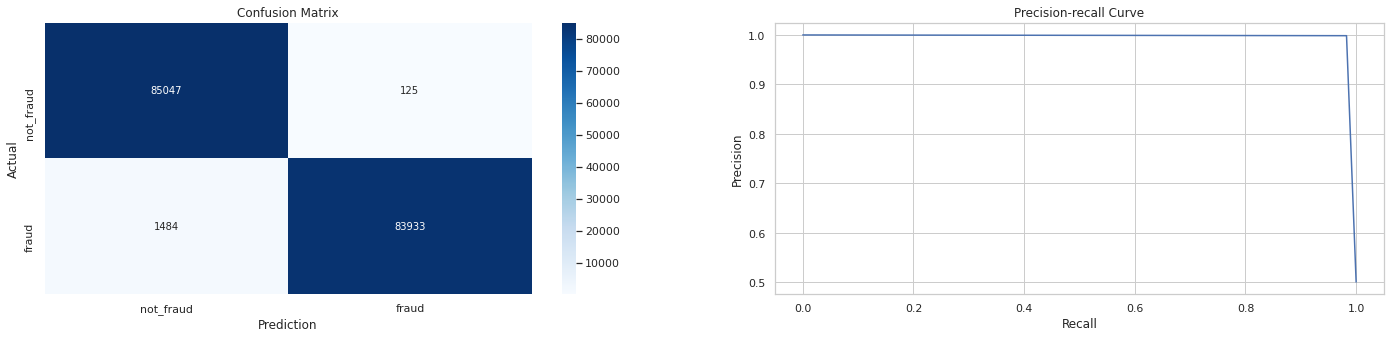

Sensitivity/Recall for RFC Model 1 : 0.98
Precision for RFC Model 1 : 1.0
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  99.05679733159816


In [24]:
from pyod.models.iforest import IForest
clf = IForest()
clf.fit(X_resample)
c = clf.decision_function(X_resample) 
df['score']=c
outlier['iforest']=c
RFC(df)

### IForest + SVC

time taken by SVC is : 112.463013671
Classifcation report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     14921
           1       0.97      0.92      0.95     15079

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



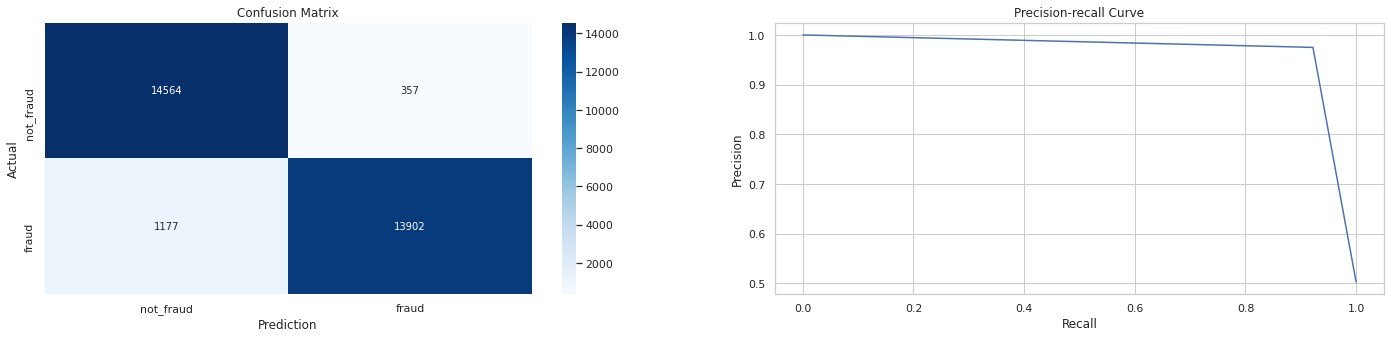

Sensitivity/Recall for SVC Model 1 : 0.92
Precision for SVC Model 1 : 0.97
F1 Score for SVC Model 1 : 0.95
accuracy of the SVC model is:  94.88666666666667


In [25]:
SVC(df)
del df['score']

### CBLOF + RFC

time taken by RFC is : 65.57750001199997
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



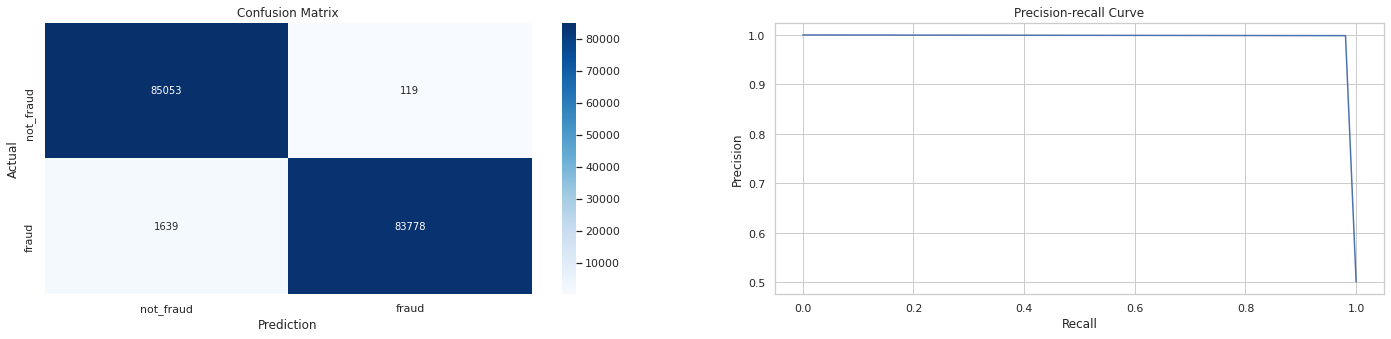

Sensitivity/Recall for RFC Model 1 : 0.98
Precision for RFC Model 1 : 1.0
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  98.96945289555599


In [26]:
from pyod.models.cblof import CBLOF
clf = CBLOF()
clf.fit(X_resample)

c = clf.decision_function(X_resample) 
df['score']=c
outlier['cblof']=c
RFC(df)

### CBLOF + SVC

time taken by SVC is : 103.448267472
Classifcation report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15005
           1       0.97      0.94      0.96     14995

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



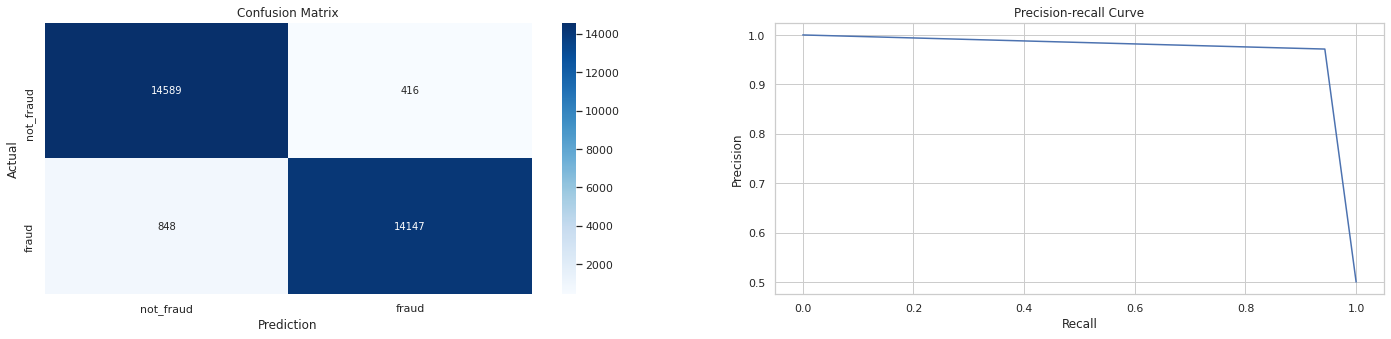

Sensitivity/Recall for SVC Model 1 : 0.94
Precision for SVC Model 1 : 0.97
F1 Score for SVC Model 1 : 0.96
accuracy of the SVC model is:  95.78666666666666


In [27]:
SVC(df)
del df['score']

### HBOS + RFC

time taken by RFC is : 64.92413335000003
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



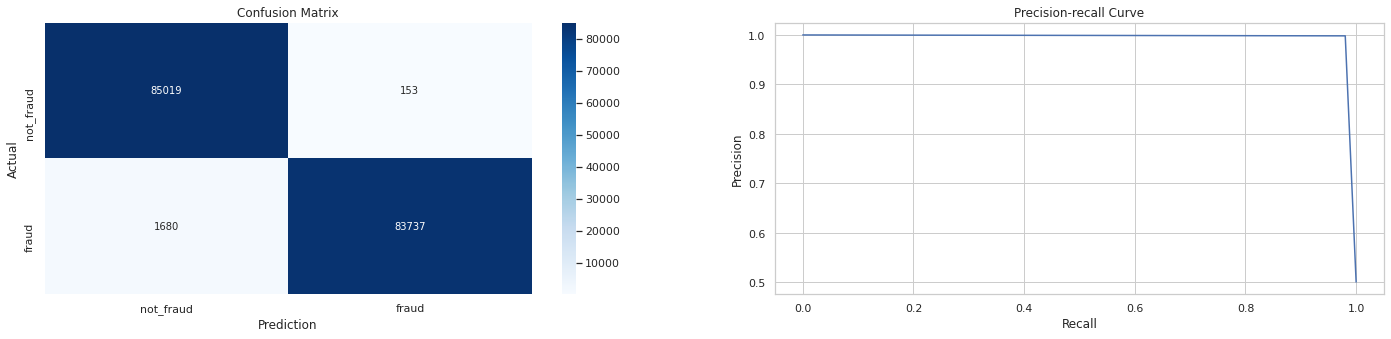

Sensitivity/Recall for RFC Model 1 : 0.98
Precision for RFC Model 1 : 1.0
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  98.92548757540052


In [28]:
from pyod.models.hbos import HBOS
clf = HBOS()
clf.fit(X_resample)

c = clf.decision_function(X_resample) 
df['score']=c
outlier['hbos']=c
RFC(df)

### HBOS + SVC

time taken by SVC is : 123.61055664699995
Classifcation report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     14914
           1       0.98      0.93      0.95     15086

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



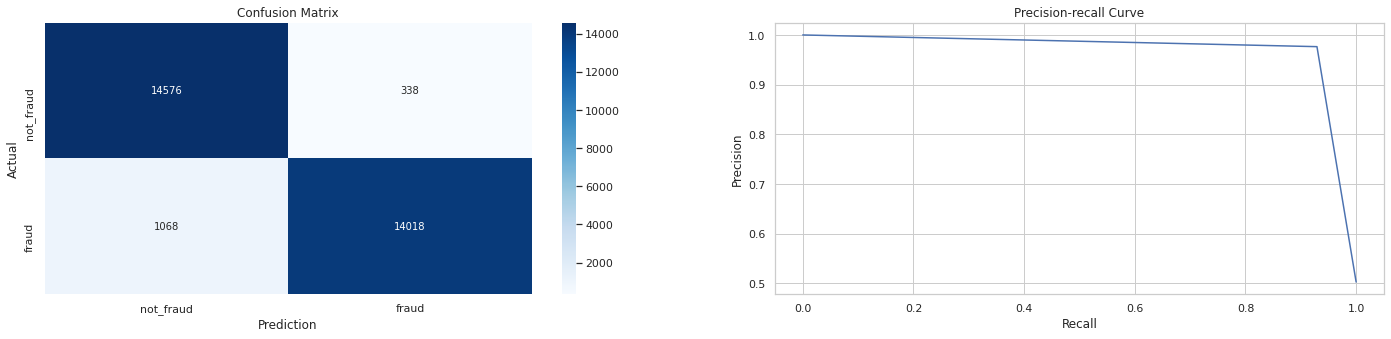

Sensitivity/Recall for SVC Model 1 : 0.93
Precision for SVC Model 1 : 0.98
F1 Score for SVC Model 1 : 0.95
accuracy of the SVC model is:  95.31333333333333


In [29]:
SVC(df)
del df['score']

### All Unsupervised + RFC

time taken by RFC is : 64.72414461400001
Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     85172
           1       1.00      0.98      0.99     85417

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



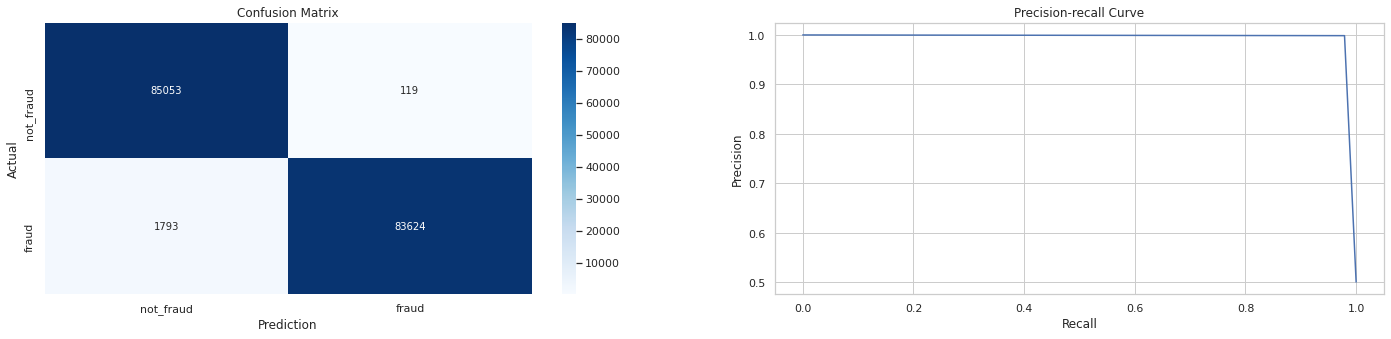

Sensitivity/Recall for RFC Model 1 : 0.98
Precision for RFC Model 1 : 1.0
F1 Score for RFC Model 1 : 0.99
accuracy of the RFC model is:  98.8791774381701


In [30]:
#combining all outliers
result = pd.concat([df, outlier], axis=1)
RFC(result)

### All Unsupervised + SVC

time taken by SVC is : 116.45975027999998
Classifcation report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14989
           1       0.97      0.95      0.96     15011

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



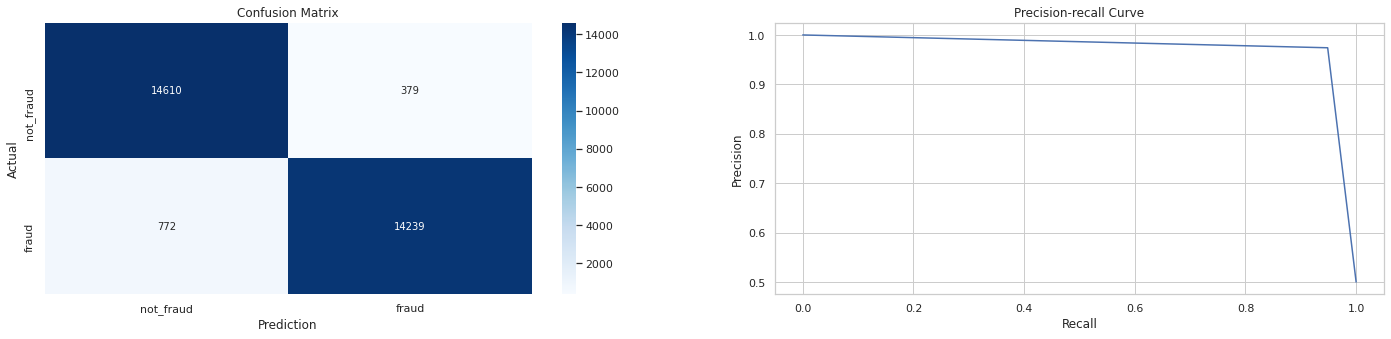

Sensitivity/Recall for SVC Model 1 : 0.95
Precision for SVC Model 1 : 0.97
F1 Score for SVC Model 1 : 0.96
accuracy of the SVC model is:  96.16333333333333


In [31]:
SVC(result)